In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Необходимо понять, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

# Часть 1: загрузка датасета компании Fandango про фильмы, исследование датасета

In [4]:
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
# Первые 5 строк
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
# Общая информация
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
# Описательная статистика
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Исследование связи между популярностью фильма и его рейтингом.**

Text(0.5, 1.0, 'Связь колонок Rating и Votes')

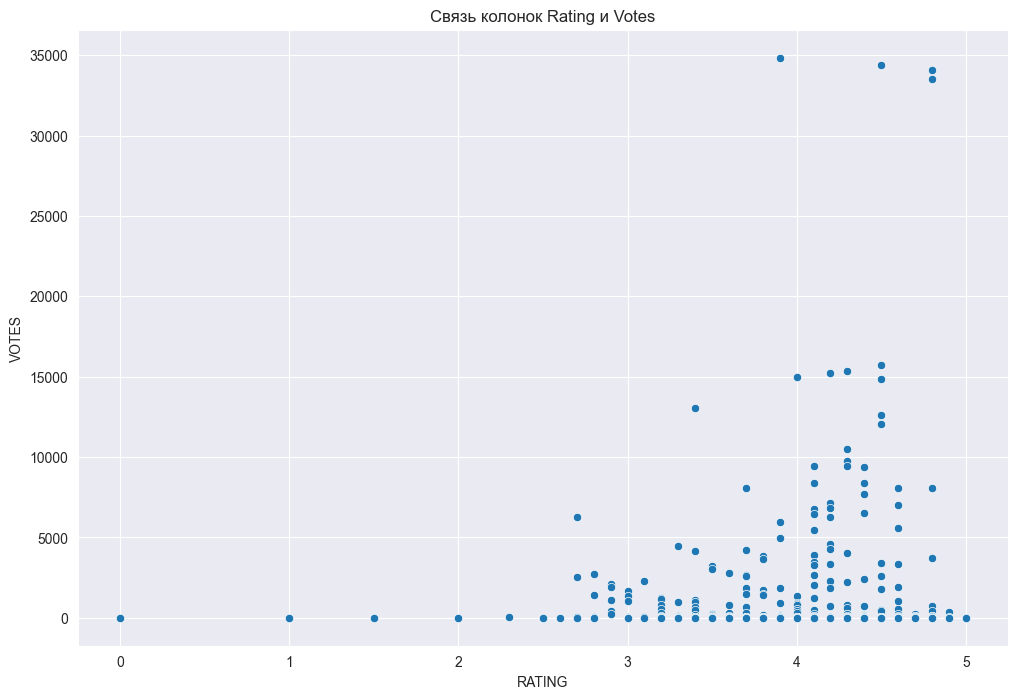

In [69]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(data=fandango, x='RATING', y='VOTES')
plt.title('Связь колонок Rating и Votes')

**Вычисление корреляции между колонками**

In [8]:
fandango.corr()

C:\Users\Турбо\AppData\Local\Temp\ipykernel_15712\1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Добавление к датасету колонки YEAR**

In [43]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: (x.split()[-1])[1:-1])
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Определение количества фильмов в год и визуализация**

In [10]:
count = fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Text(0.5, 1.0, 'Количество фильмов')

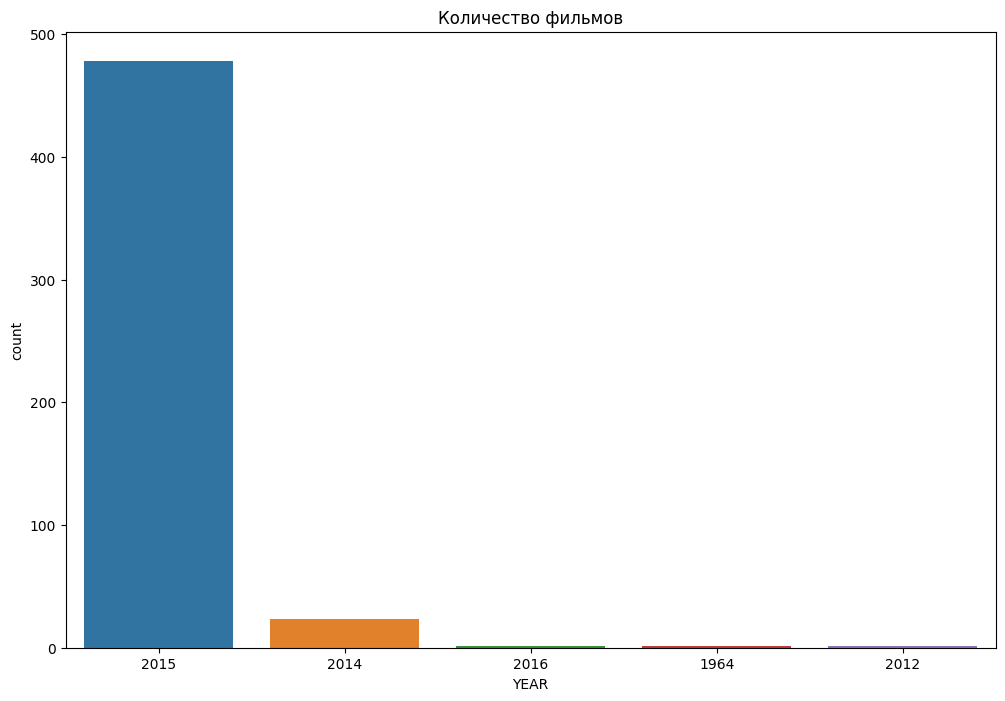

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(data=fandango, x='YEAR')
plt.title('Количество фильмов')

**10 Самых популярных фильмов**

In [24]:
fandango.sort_values(by='VOTES', ascending=False)
fandango.head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Удаление не оценённых фильмов**

In [25]:
# Количество не оценённых фильмов
len(fandango[fandango['VOTES'] == 0])

69

In [26]:
fandango = fandango[fandango['VOTES'] != 0]
fandango.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


----
**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**

Text(0.5, 1.0, 'Истинный рейтинг на сайте и рейтинг звёзд на сайте')

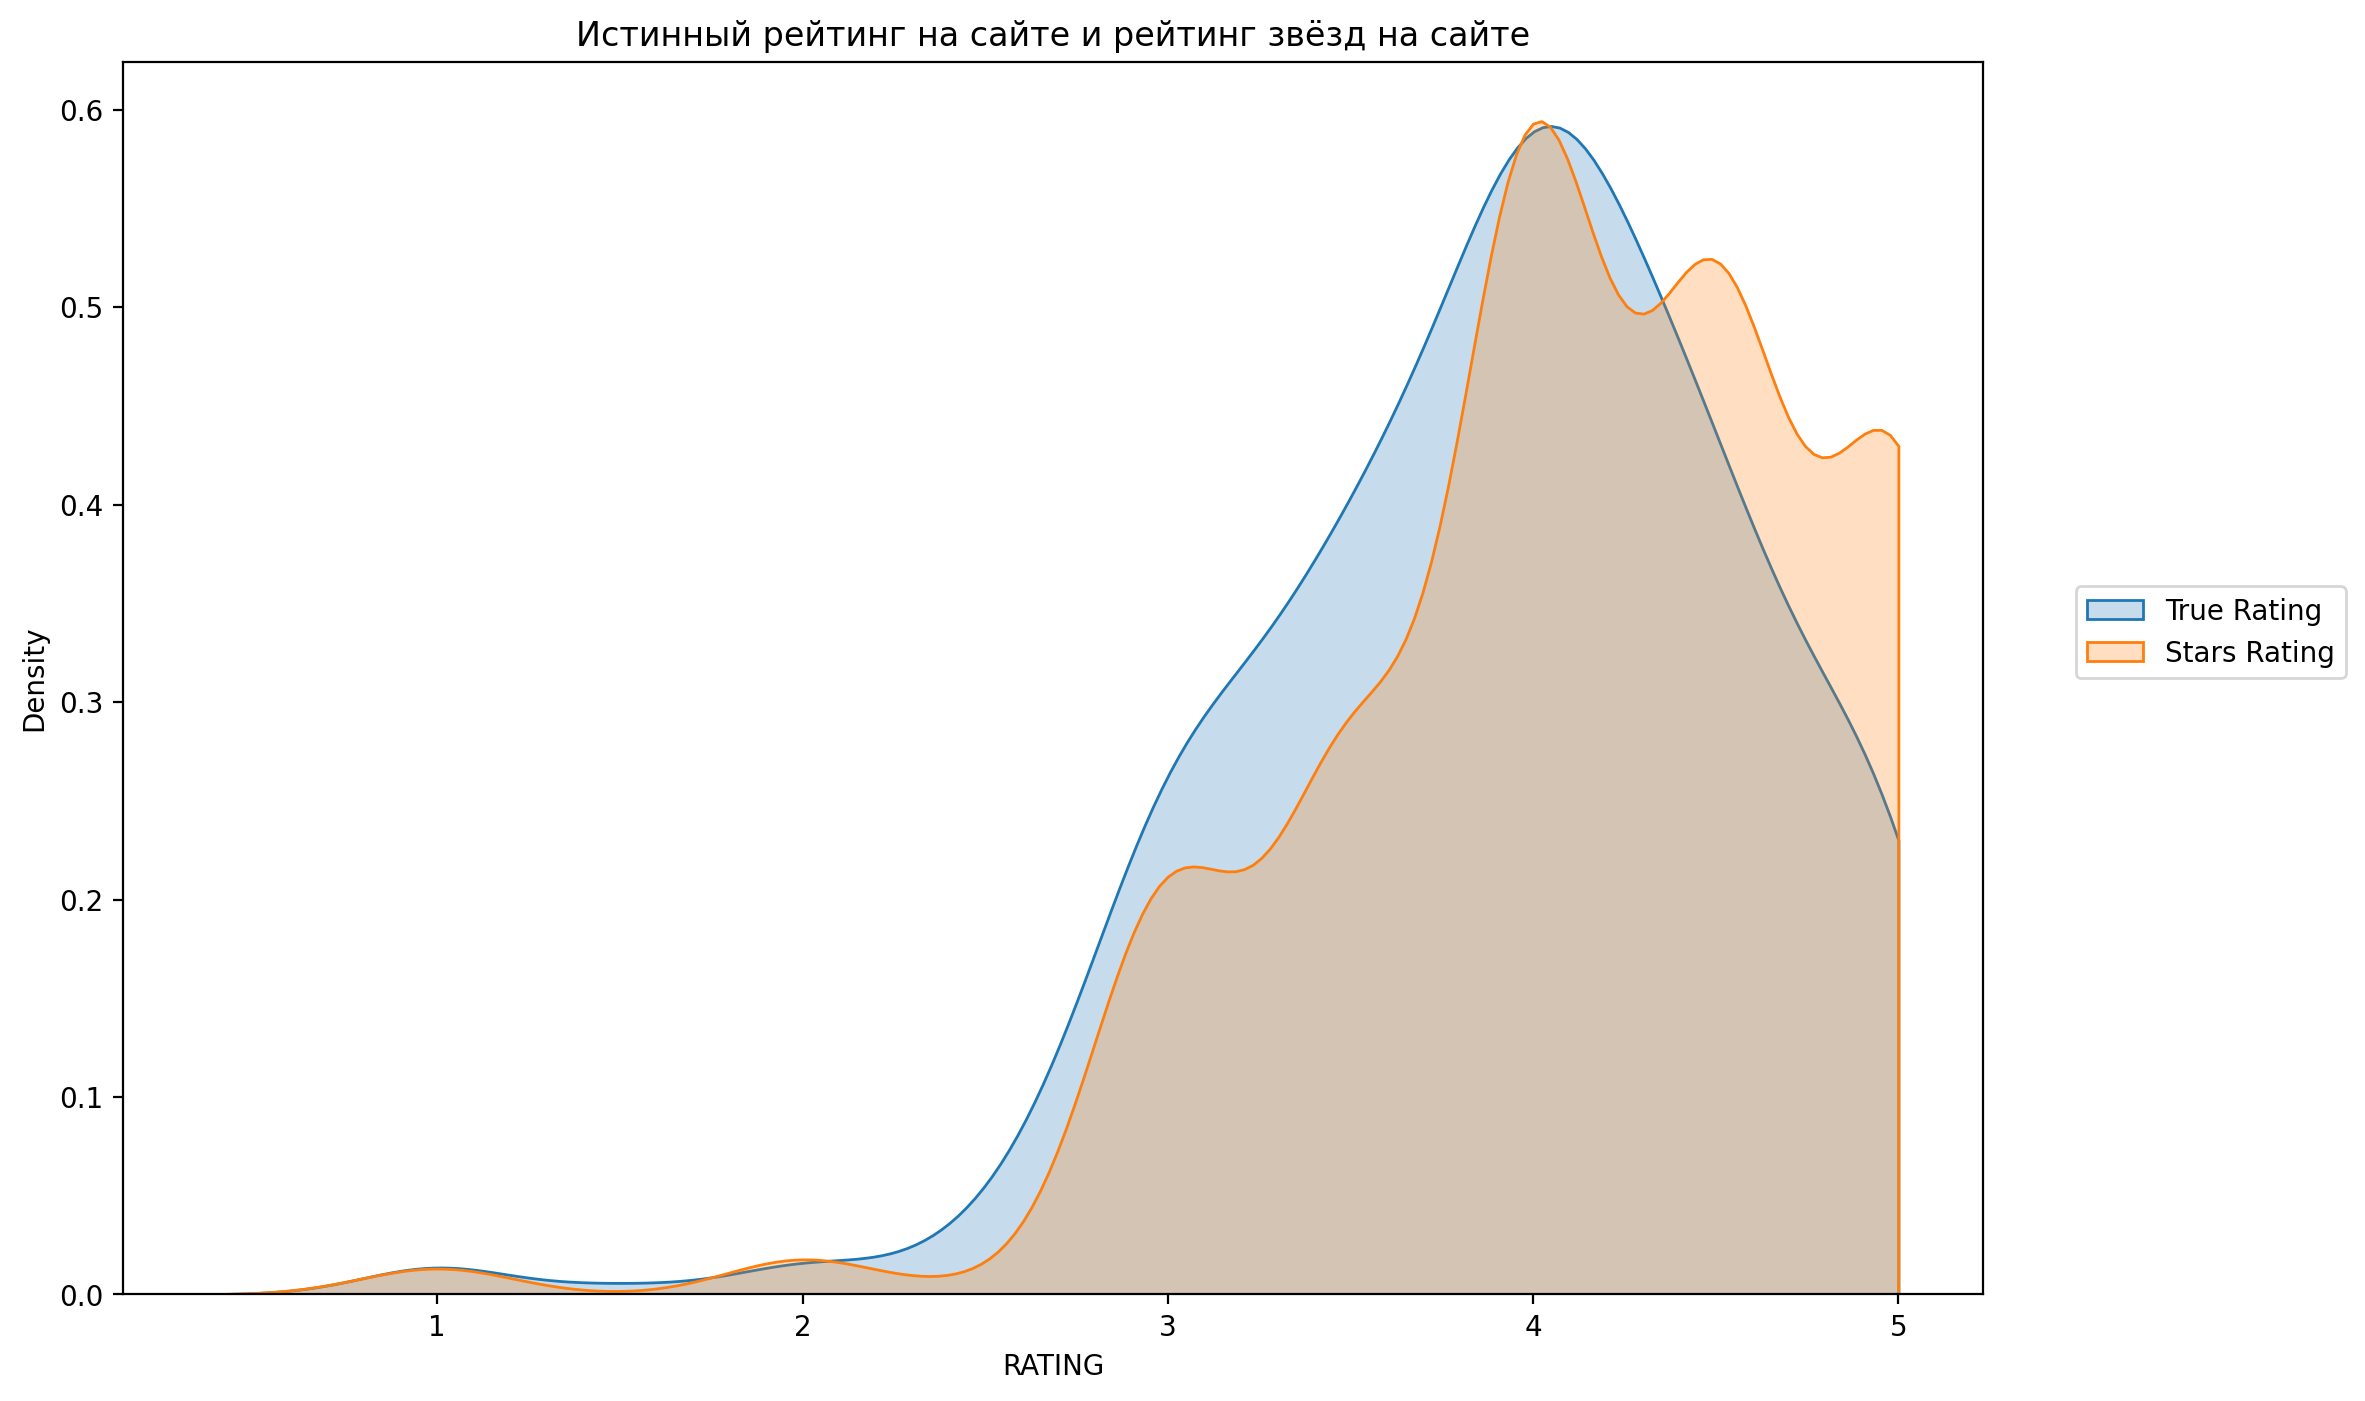

In [27]:
plt.figure(figsize=(12,8),dpi=200)
sns.kdeplot(data=fandango, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fandango, x='STARS', clip=[0,5], fill=True, label='Stars Rating')
plt.legend(loc=(1.05, 0.5))
plt.title('Истинный рейтинг на сайте и рейтинг звёзд на сайте')

**Чтобы точно оценить эту разницу в оценках, сначала добавим новый столбец с разнцией, а затем визуализируем полученное.**

In [28]:
fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'], 1)
fandango.head()

C:\Users\Турбо\AppData\Local\Temp\ipykernel_15712\2769445681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


Text(0.5, 1.0, 'Сколько раз встречается та или иная разница')

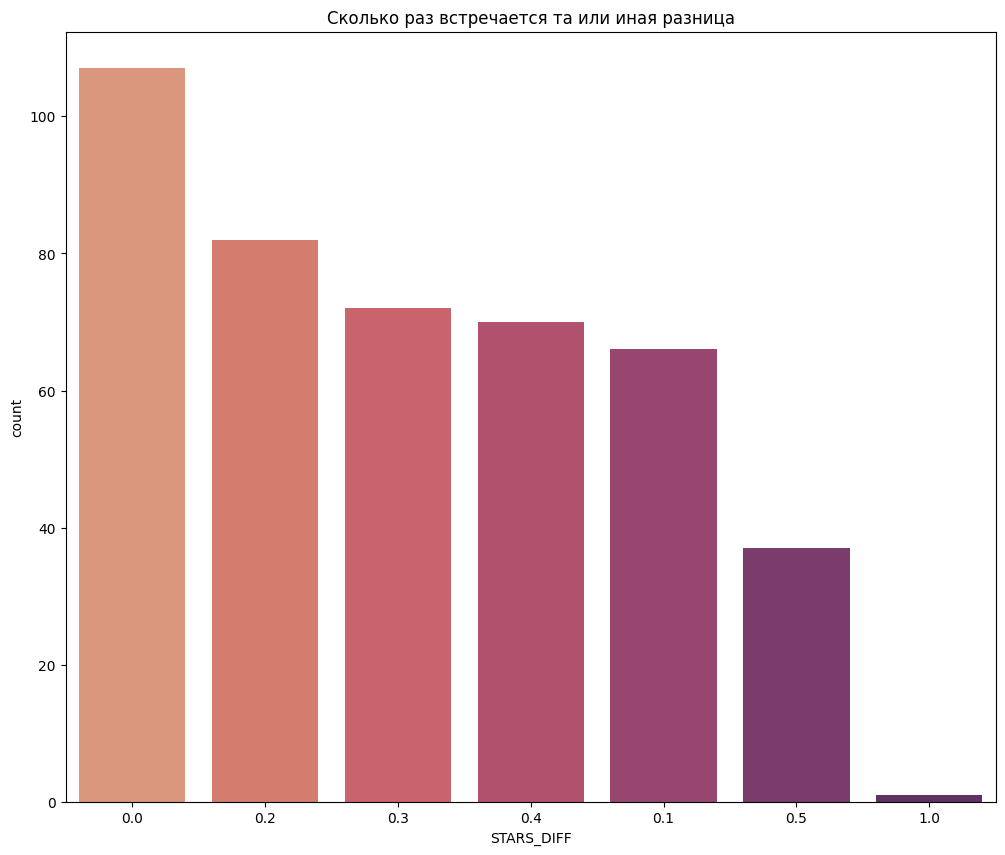

In [38]:
plt.figure(figsize=(12,10),dpi=100)
sns.countplot(data=fandango, x='STARS_DIFF', palette='flare', 
              order=fandango['STARS_DIFF'].value_counts().index)
plt.title('Сколько раз встречается та или иная разница')

In [39]:
# Где-то разница доходит даже до 1!
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


----

**Из исследований можно сделать вывод, что на сайте Fandango истинный рейтинг сильно отличается от рейтинга по шкале звёзд. Причём разница не может быть отрицательной, значит рейтинг звёзд округляется только в большую сторону.**

# Часть 2: Сравнение рейтингов Fandango с рейтингами других компаний

In [6]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [7]:
# Вывод первых 5 строк
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [8]:
# Общая информация
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [9]:
# Статистические данные
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [11]:
# Выявим корреляцию между всеми колонками
all_sites.corr()

C:\Users\Турбо\AppData\Local\Temp\ipykernel_14420\2901894998.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_sites.corr()


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
RottenTomatoes,1.000000,0.781440,0.957360,0.754296,0.779671,0.111325,0.107083
RottenTomatoes_User,0.781440,1.000000,0.690998,0.687132,0.895297,0.198320,0.221776
Metacritic,0.957360,0.690998,1.000000,0.723459,0.727298,0.138184,0.114507
Metacritic_User,0.754296,0.687132,0.723459,1.000000,0.756265,0.121478,0.112580
IMDB,0.779671,0.895297,0.727298,0.756265,1.000000,0.205573,0.230058
Metacritic_user_vote_count,0.111325,0.198320,0.138184,0.121478,0.205573,1.000000,0.880635
IMDB_user_vote_count,0.107083,0.221776,0.114507,0.112580,0.230058,0.880635,1.000000


## Рейтинги от RottenTomatoes
**Начнём с рейтингов RottenTomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги.**

Text(0.5, 1.0, 'Связь между пользовательскими рейтингами и официальными рейтингами')

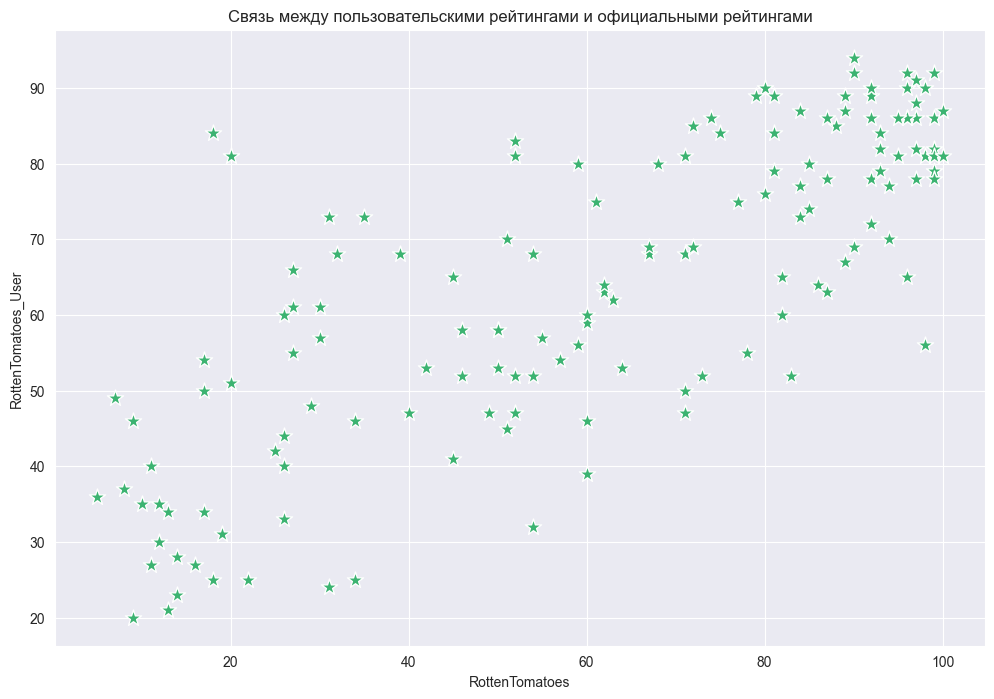

In [66]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User',
                marker='*',s=150, color='mediumseagreen')
plt.title('Связь между пользовательскими рейтингами и официальными рейтингами')

**Изучим разницу между этими колонками. Для этого добавим новую колонку в датафрейм и нарисуем график распределения.**

In [12]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Text(0.5, 1.0, 'Разница между оценками пользователей и критиков')

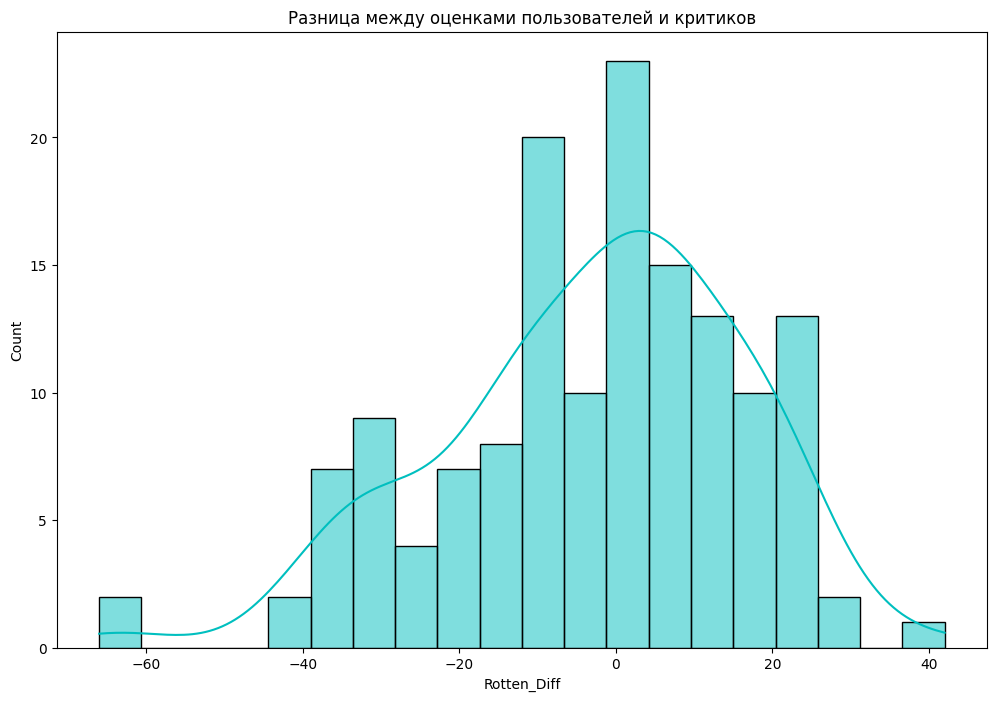

In [13]:
plt.figure(figsize=(12,8))
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=20, color='c')
plt.title('Разница между оценками пользователей и критиков')

Text(0.5, 1.0, 'Абсолютная разница между оценками пользователей и критиков')

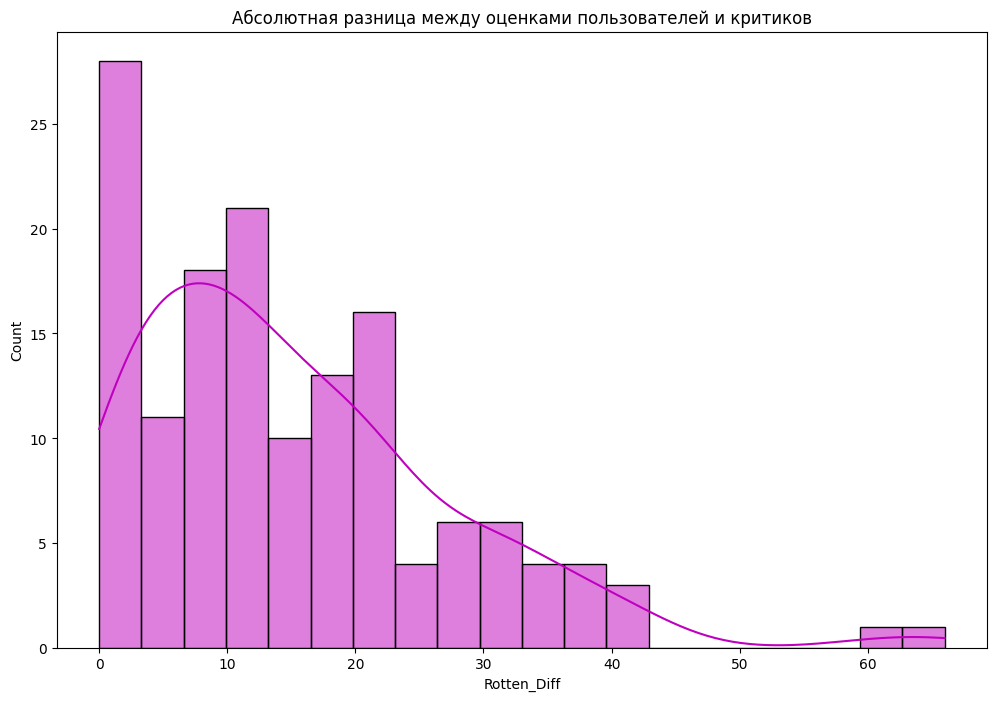

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(data=all_sites, x=all_sites['Rotten_Diff'].apply(lambda x: abs(x)), kde=True, bins=20, color='m')
plt.title('Абсолютная разница между оценками пользователей и критиков')

In [15]:
# 5 фильмов с самой большой разницей оценок, в которых пользователи оценили выше
all_sites.sort_values(by='Rotten_Diff')[['FILM', 'Rotten_Diff']][:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [16]:
# 5 фильмов с самой большой разницей оценок, в которых критики оценили выше
all_sites.sort_values(by='Rotten_Diff', ascending=False)[['FILM', 'Rotten_Diff']][:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Рейтинги от MetaCritic
**Здесь тоже представлены рейтинги пользователей и критиков.**

Text(0.5, 1.0, 'Связь между пользовательскими рейтингами и официальными рейтингами')

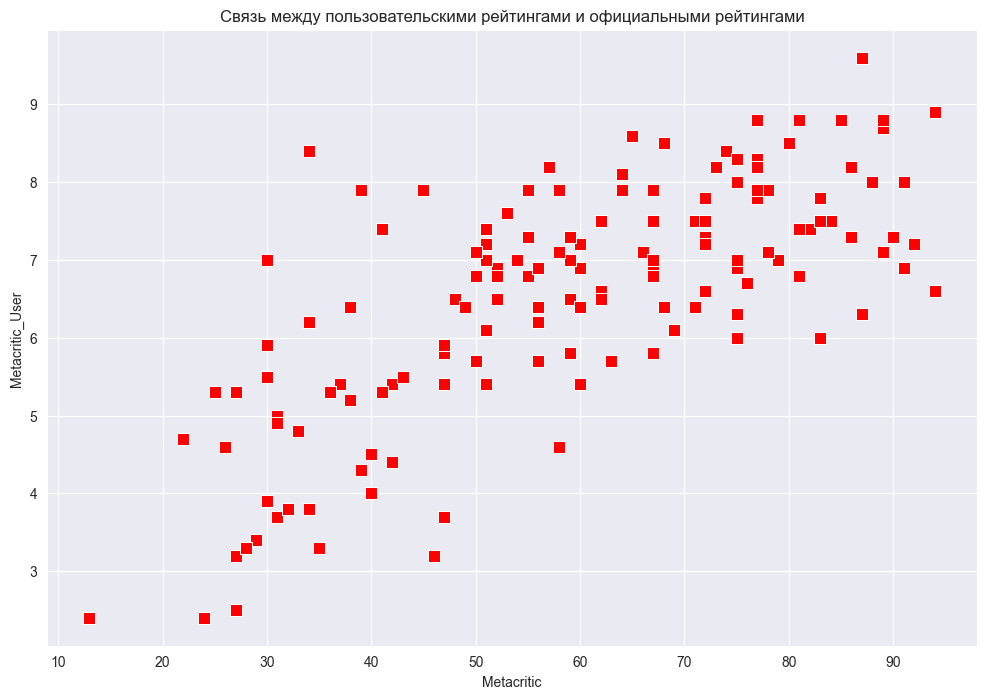

In [67]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User', marker="s", s=80, color='r')
plt.title('Связь между пользовательскими рейтингами и официальными рейтингами')

## Рейтинги IMDB
**В этой части рассмотрим количество проголосовавших на сайте IMDB и на сайте Metacritic.**

Text(0.5, 1.0, 'Связь между пользовательскими рейтингами и официальными рейтингами')

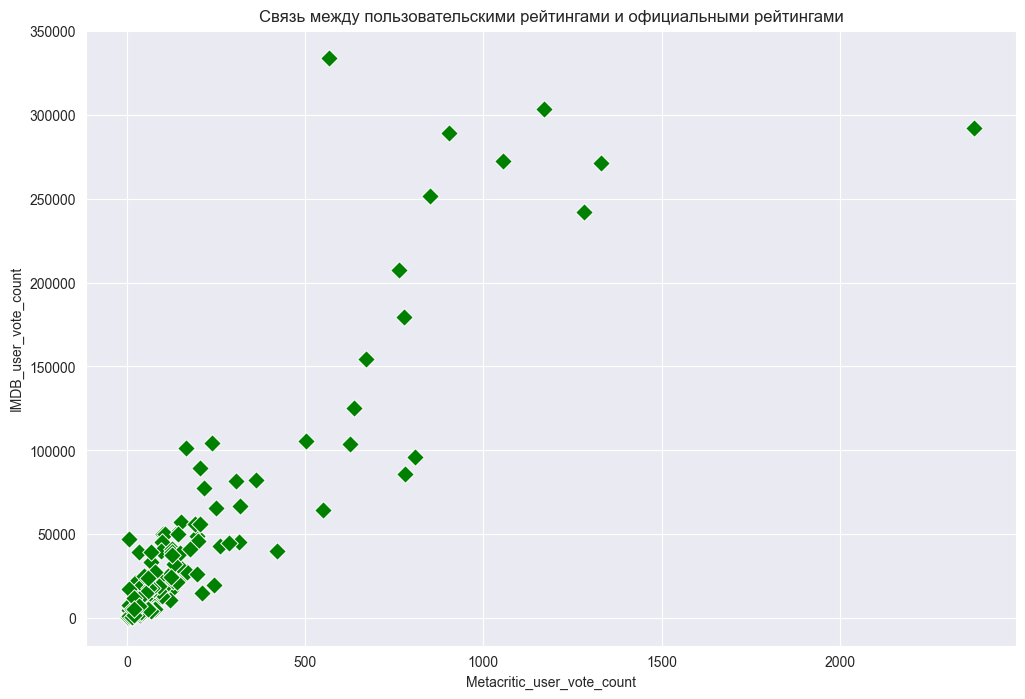

In [68]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count',
                marker='D', s=80, color='g')
plt.title('Связь между пользовательскими рейтингами и официальными рейтингами')

**На графике чётко выражены 2 выброса с наибольшим количеством голосов на каждом сайте, найдём их.**

In [38]:
all_sites['IMDB_user_vote_count'].max()

334164

In [39]:
# Для сайта IMDB
all_sites[all_sites['IMDB_user_vote_count'] == 334164]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


----

In [40]:
all_sites['Metacritic_user_vote_count'].max()

2375

In [41]:
# Для сайта Metacritic
all_sites[all_sites['Metacritic_user_vote_count'] == 2375]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний
Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Для начала объединим таблицы с Fandango и другими компаниями.**

In [44]:
compare_df = pd.merge(left=fandango, right=all_sites, how='inner')
compare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [45]:
compare_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


## Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

**Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.**

In [46]:
compare_df['RT_Norm'] = round((compare_df['RottenTomatoes'] / 20), 1)
compare_df['RTU_Norm'] = round((compare_df['RottenTomatoes_User'] / 20), 1)
compare_df['Meta_Norm'] = round((compare_df['Metacritic'] / 20), 1)
compare_df['Meta_U_Norm'] = round((compare_df['Metacritic_User'] / 2), 1)
compare_df['IMDB_Norm'] = round((compare_df['IMDB'] / 2), 1)

In [47]:
compare_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


----
**Оставим датафрейм только с нормализованными рейтингами.**

In [48]:
norm_scores = compare_df.loc[:, ['STARS', 'RATING', 'RT_Norm', 'RTU_Norm',
                             'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## Сравнение распределений рейтингов от разных компаний
**Построим графики плотности распределения для всех оценок.**

Text(0.5, 1.0, 'Все распределения рейтингов')

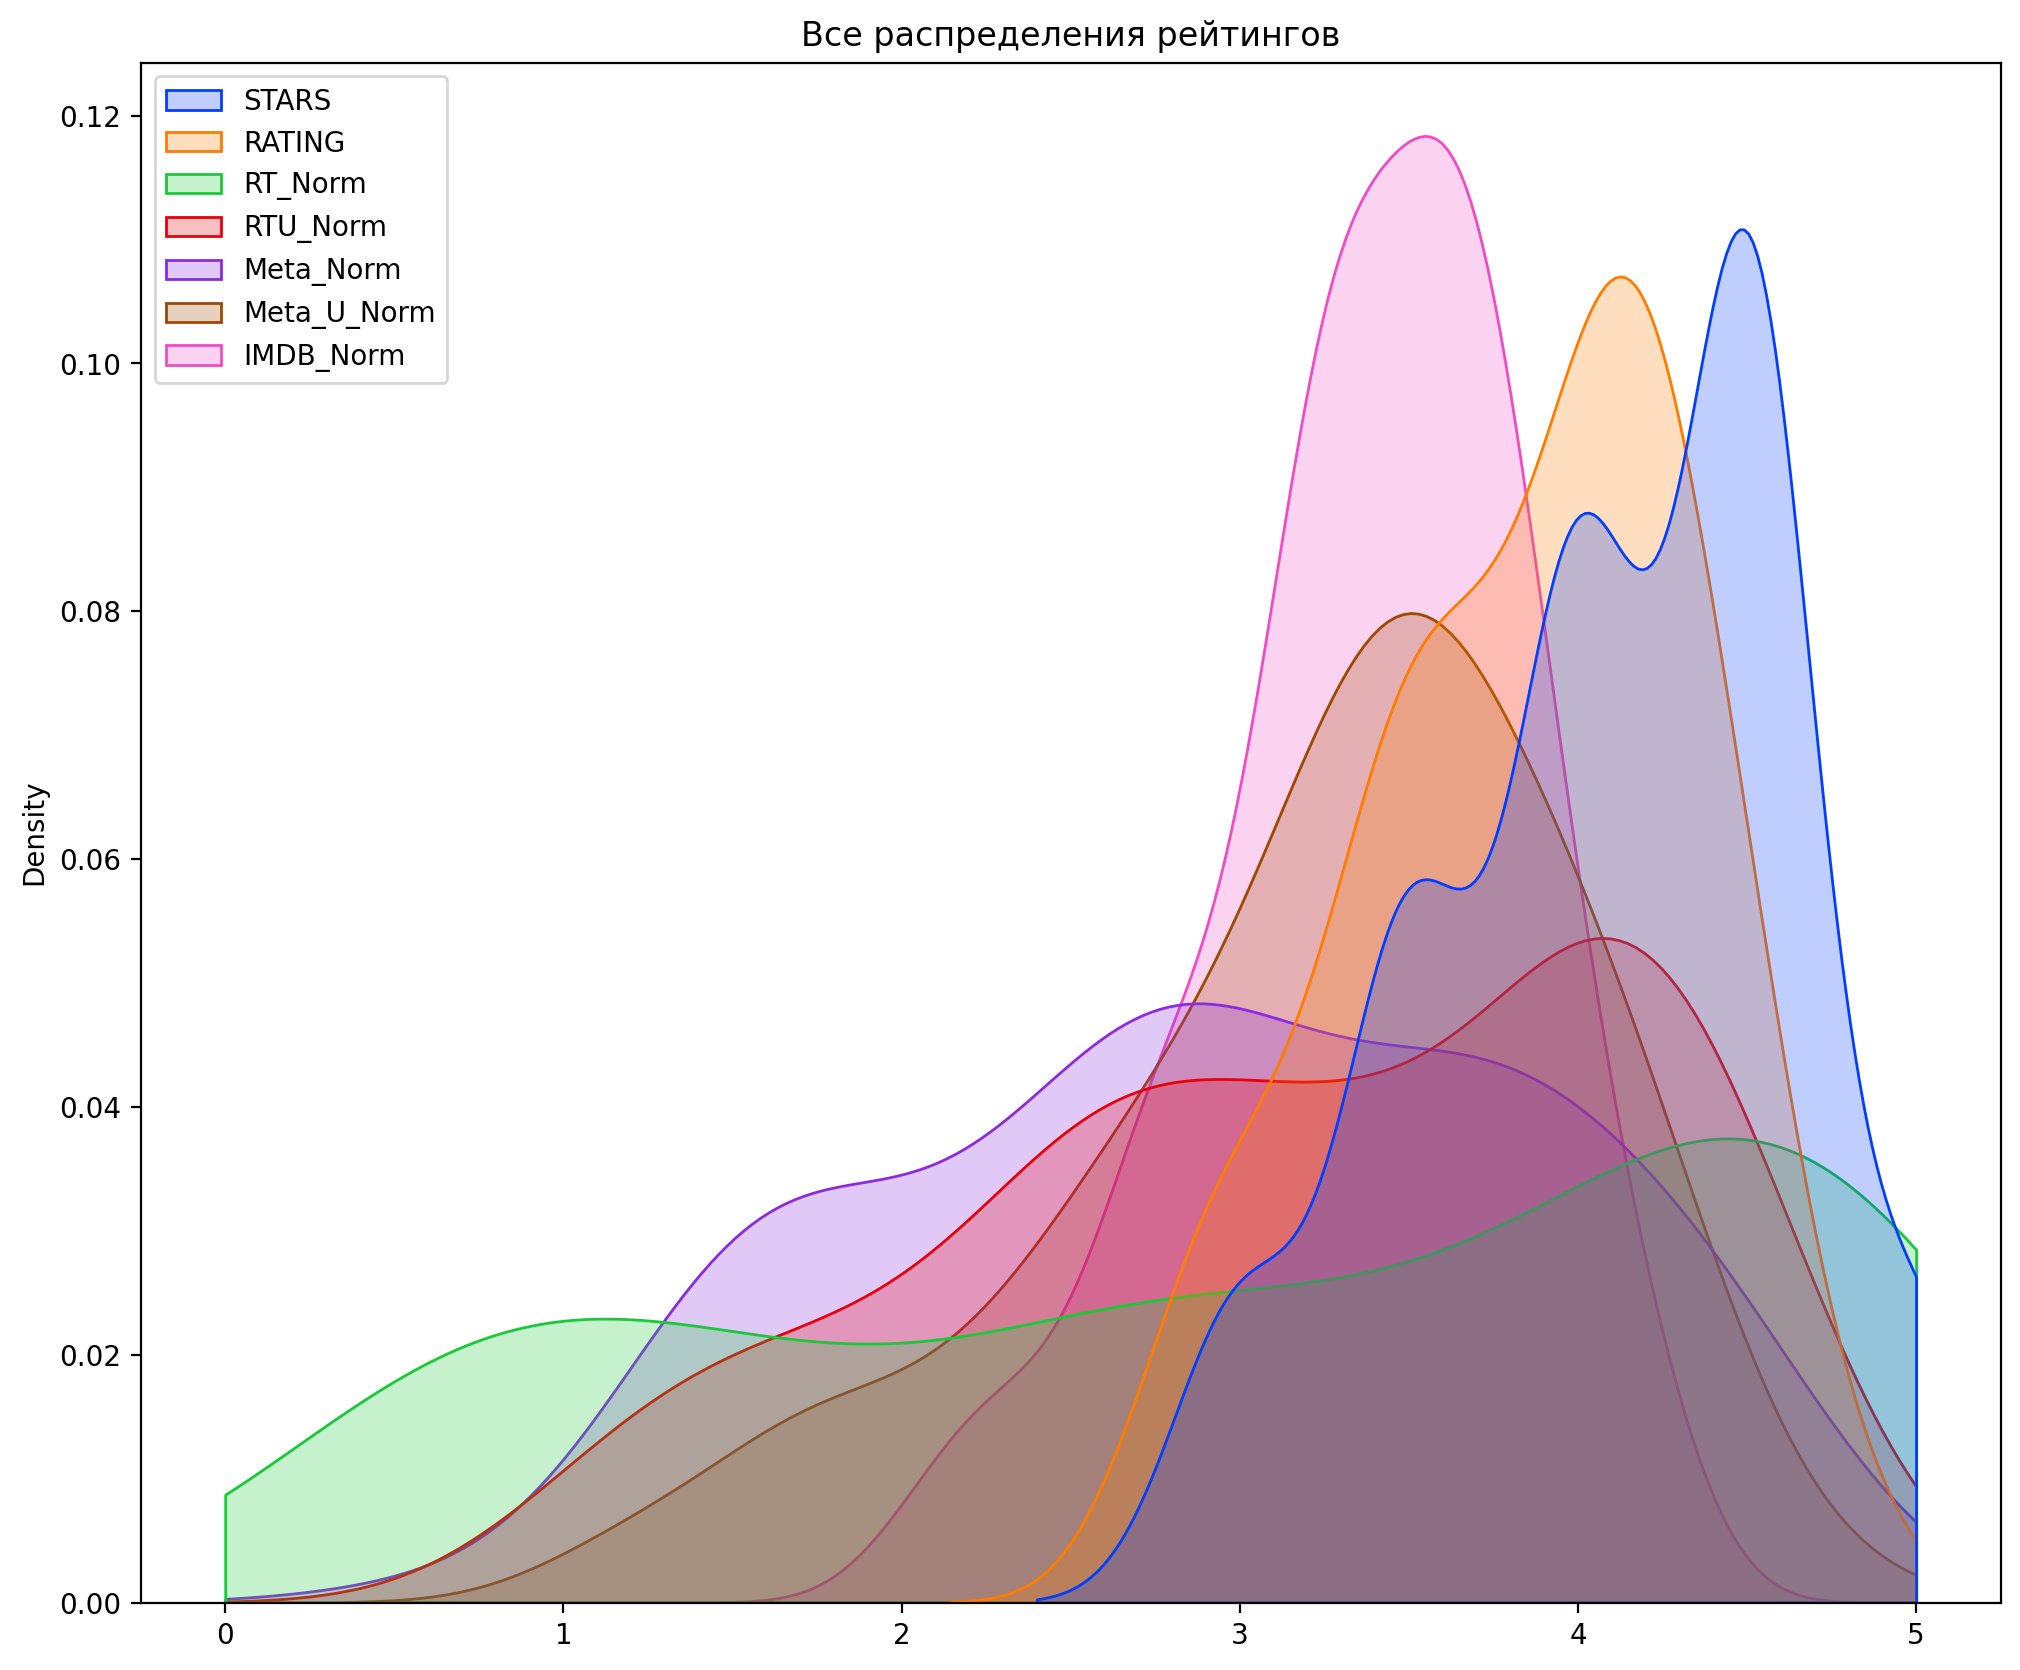

In [54]:
plt.figure(figsize=(12,10),dpi=200)
ax = sns.kdeplot(data=norm_scores, clip=[0,5], palette='bright',fill=True)
sns.move_legend(ax, 'upper left')
plt.title('Все распределения рейтингов')

**Мы сразу видим, что рейтинги Fandango очень сдвинуты вправо. Интересно также, что рейтинги RottenTomatoes от критиков имеют очень пологое распределение. Попробуем сравнить только эти два распределения.**

Text(0.5, 1.0, 'Распределение только для STARS и RT_Norm')

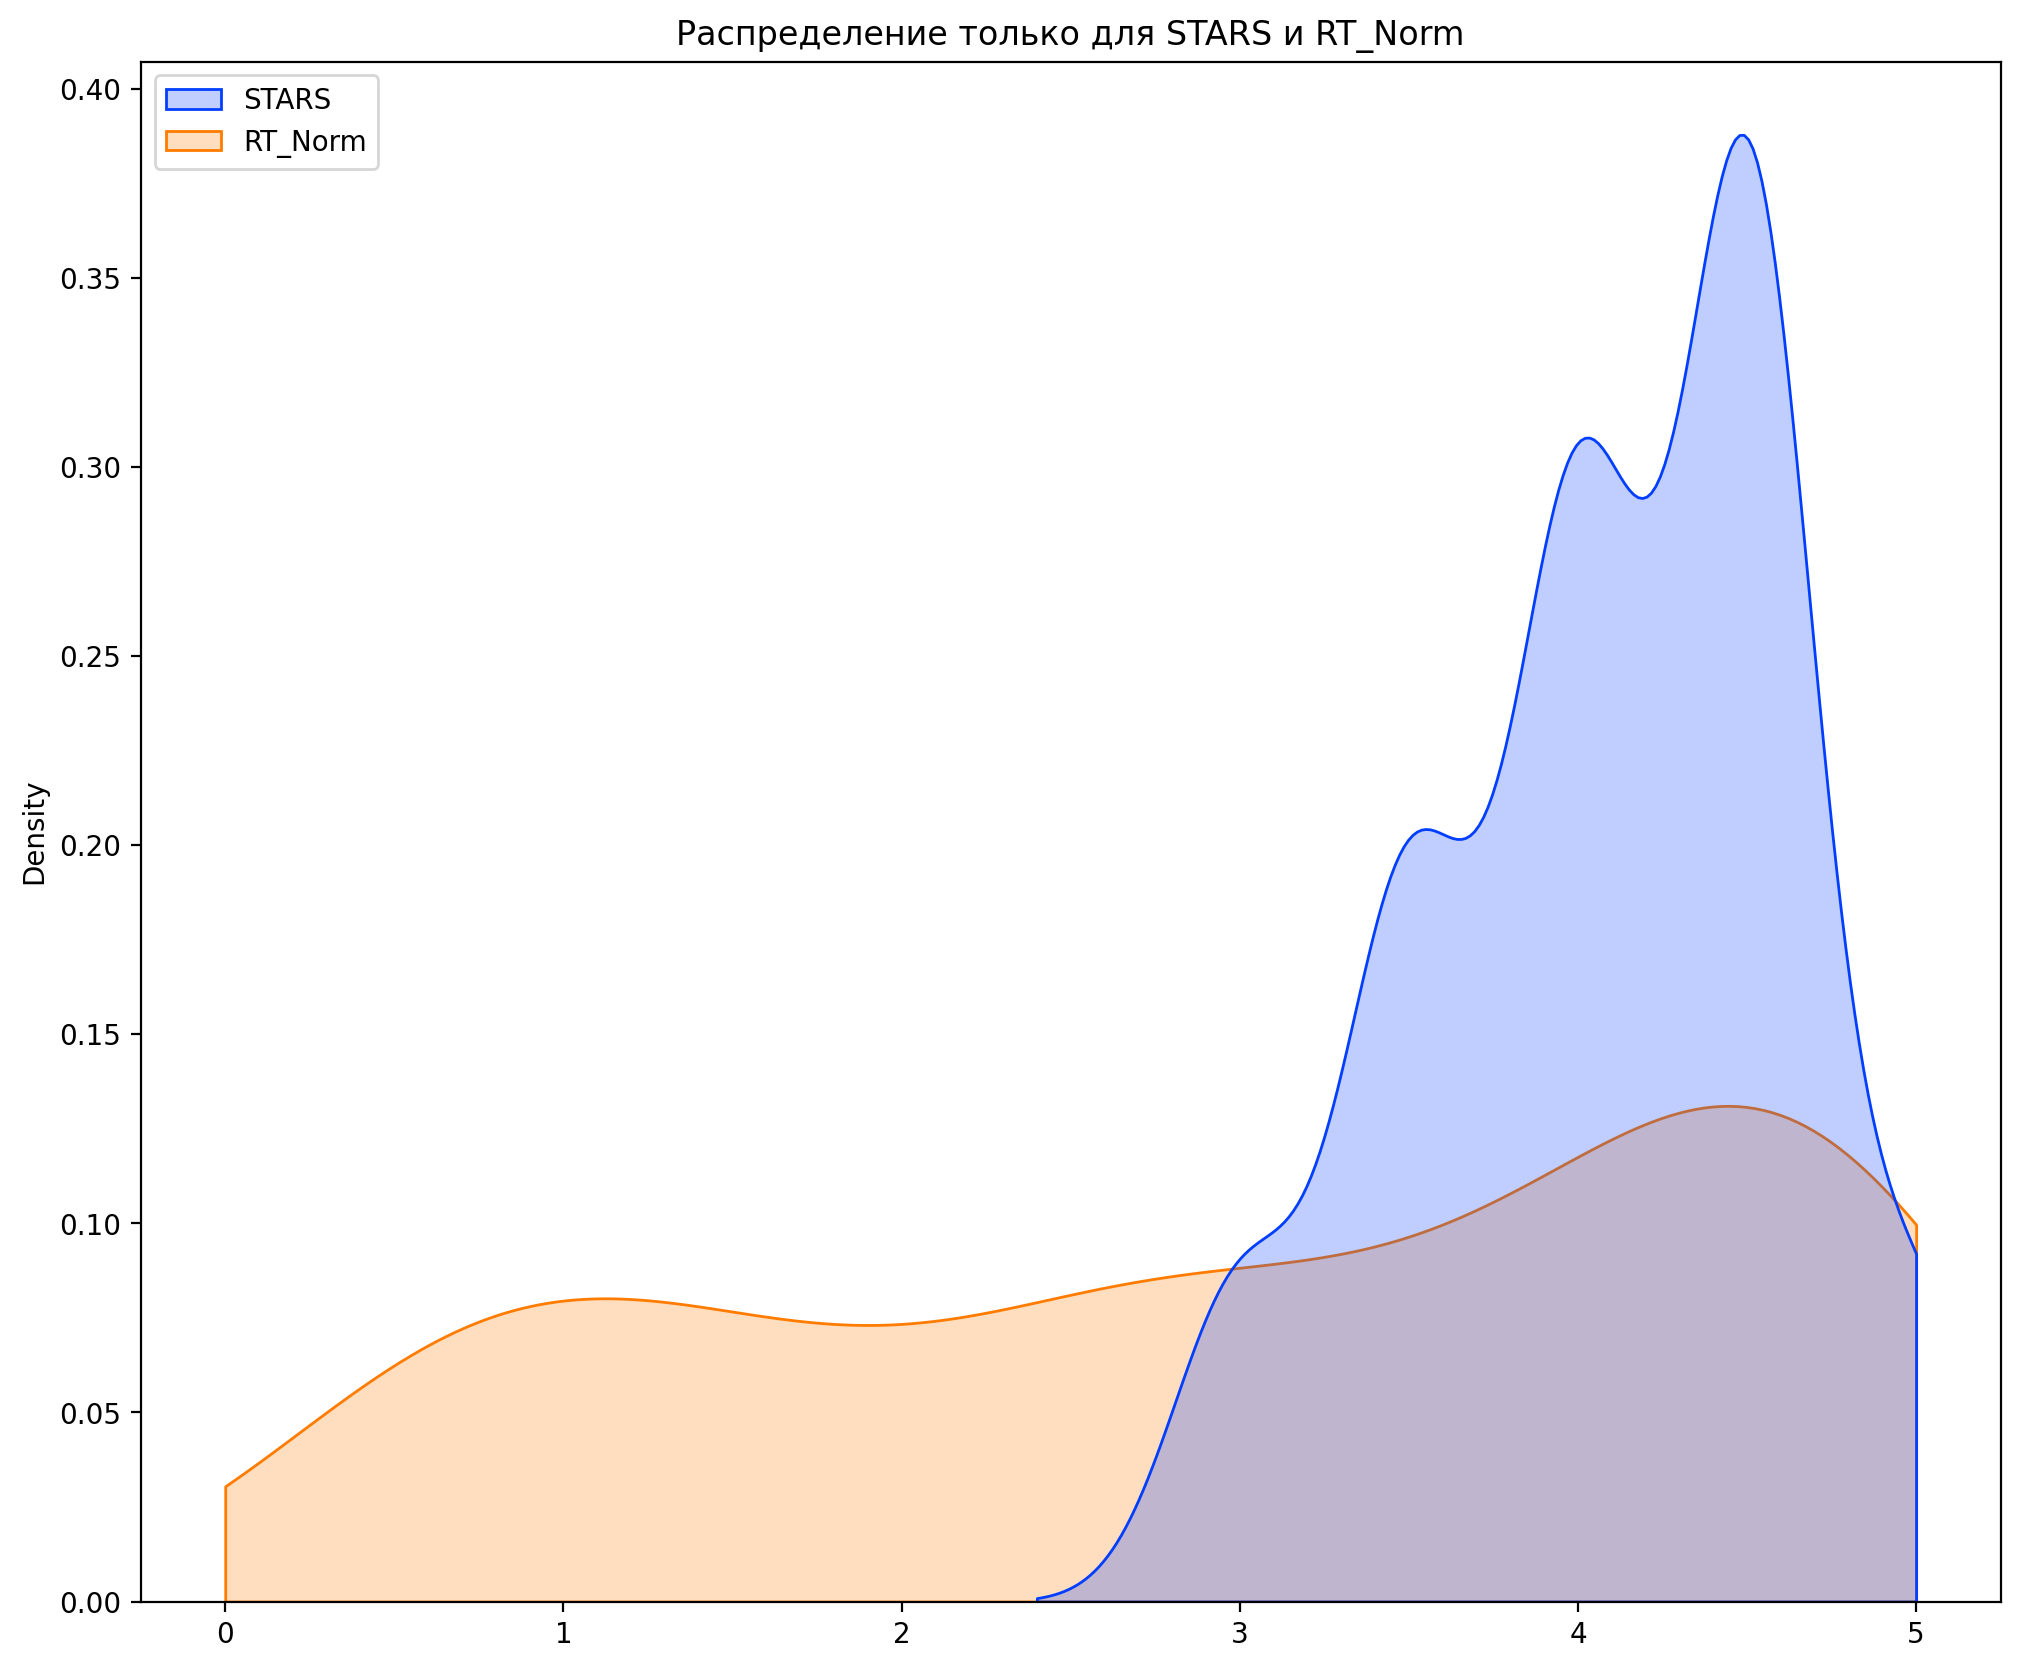

In [52]:
plt.figure(figsize=(12,10),dpi=200)
ax = sns.kdeplot(data=norm_scores.loc[:,['STARS', 'RT_Norm']], clip=[0,5], palette='bright',fill=True)
sns.move_legend(ax, 'upper left')
plt.title('Распределение только для STARS и RT_Norm')

**Также нарисуем гистограмму для всех рейтингов.**

Text(0.5, 1.0, 'Все рейтинги')

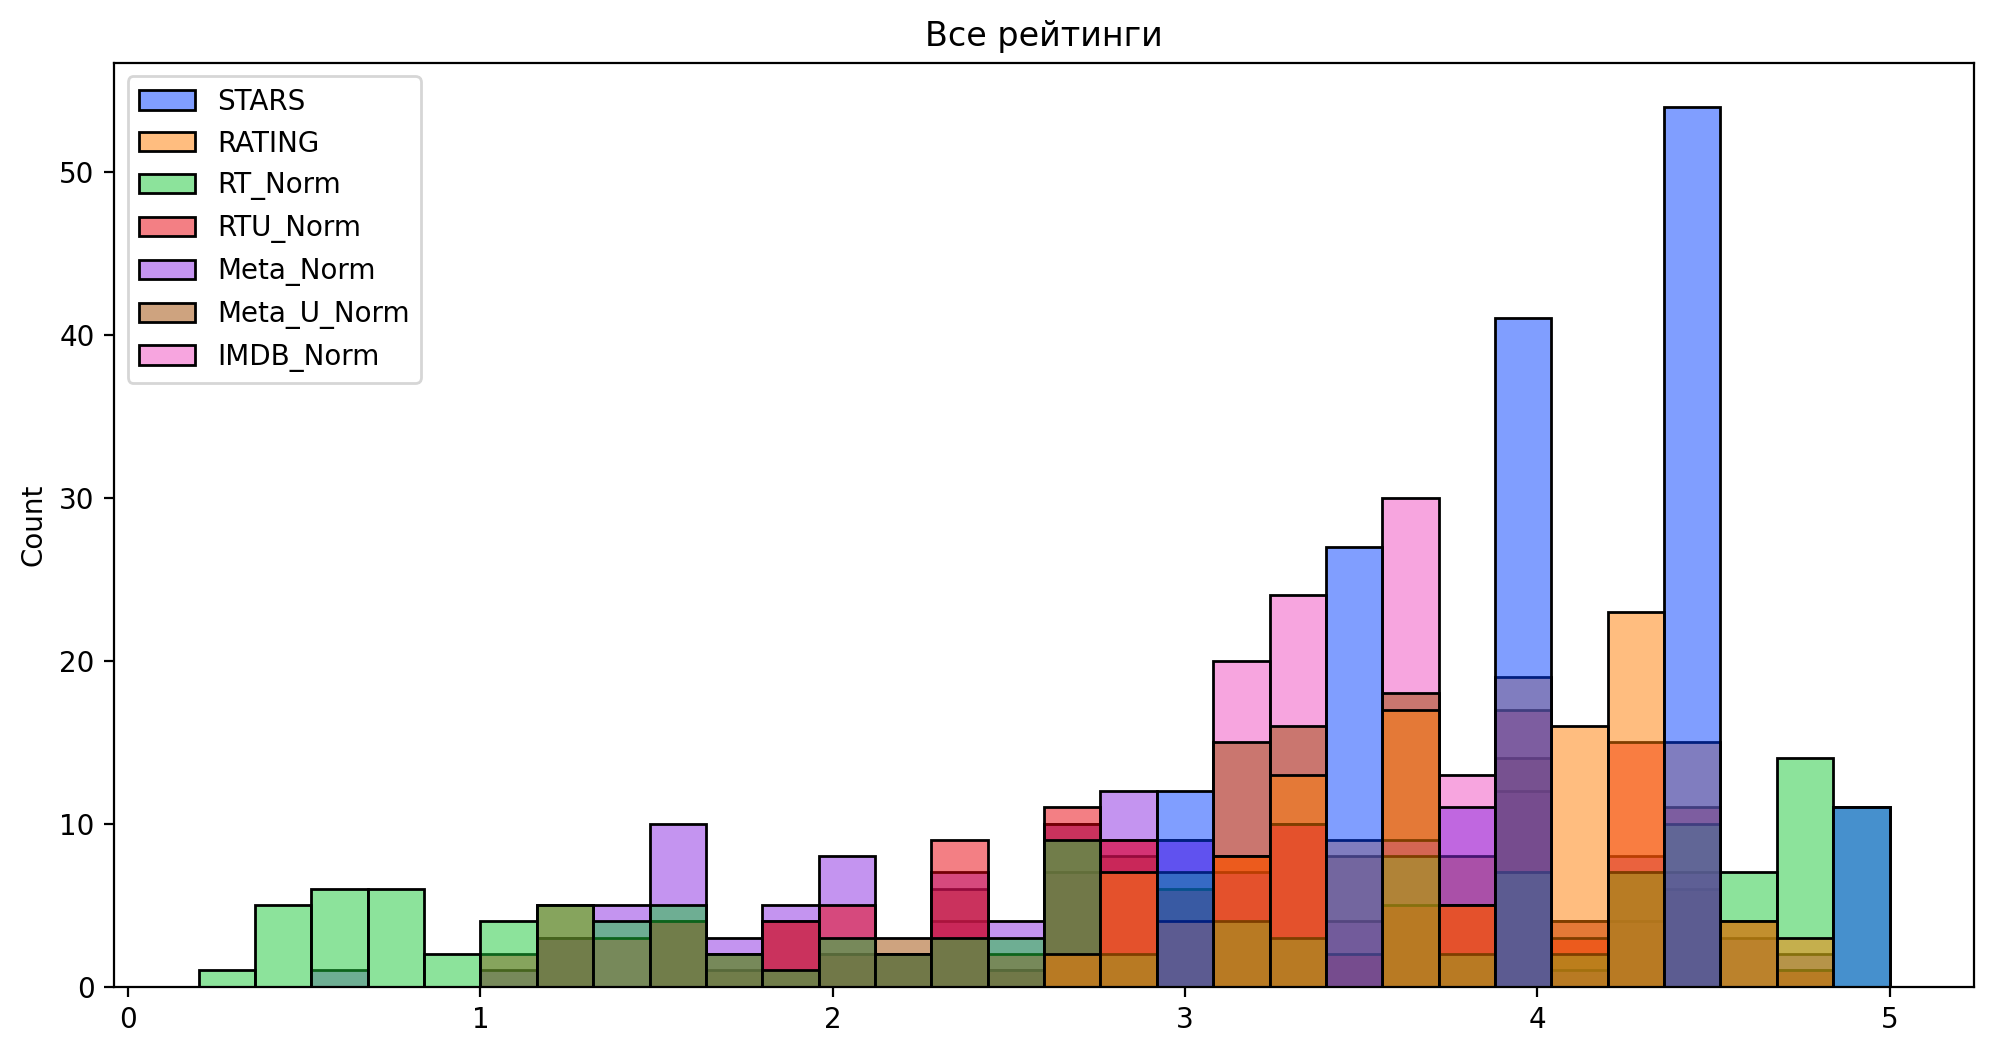

In [56]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=norm_scores, palette='bright', bins=30)
plt.title('Все рейтинги')

## Как различные компании оценивают фильмы с наименьшими рейтингами?

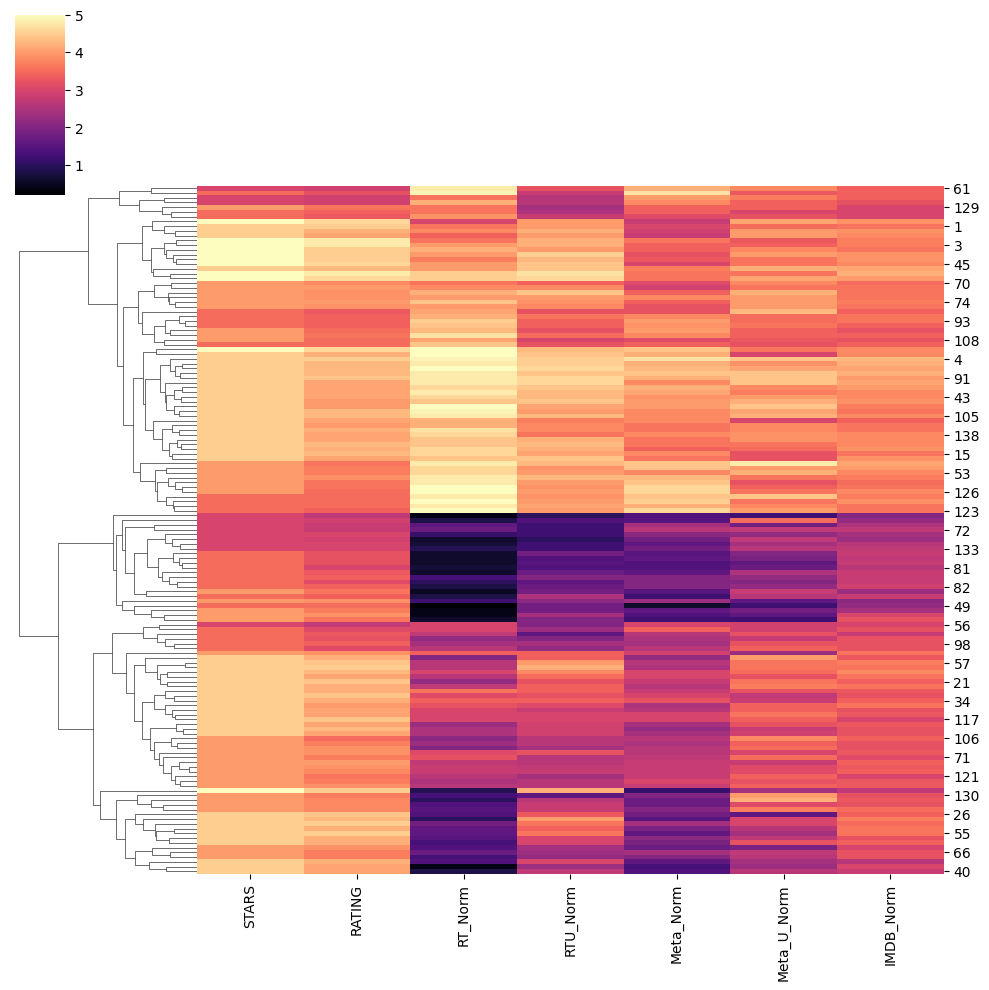

In [57]:
sns.clustermap(data=norm_scores, cmap='magma', col_cluster=False)

По вертикали откладываются номера фильмов со схожимы оценками, то есть фильмы с низкими оценками с низкими, а высокие с высокими. Шкала 1-5 оценивает рейтинг фильма.

**Выделим 10 худших фильмов по версии RottenTomatoes и построим их распределения.**

In [58]:
norm_scores['FILM'] = compare_df['FILM']
worst_df = norm_scores.sort_values(by='RT_Norm')[:10]
worst_df

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


Text(0.5, 1.0, 'Распределения оценок 10 худших фильмов по версии RottenTomatoes')

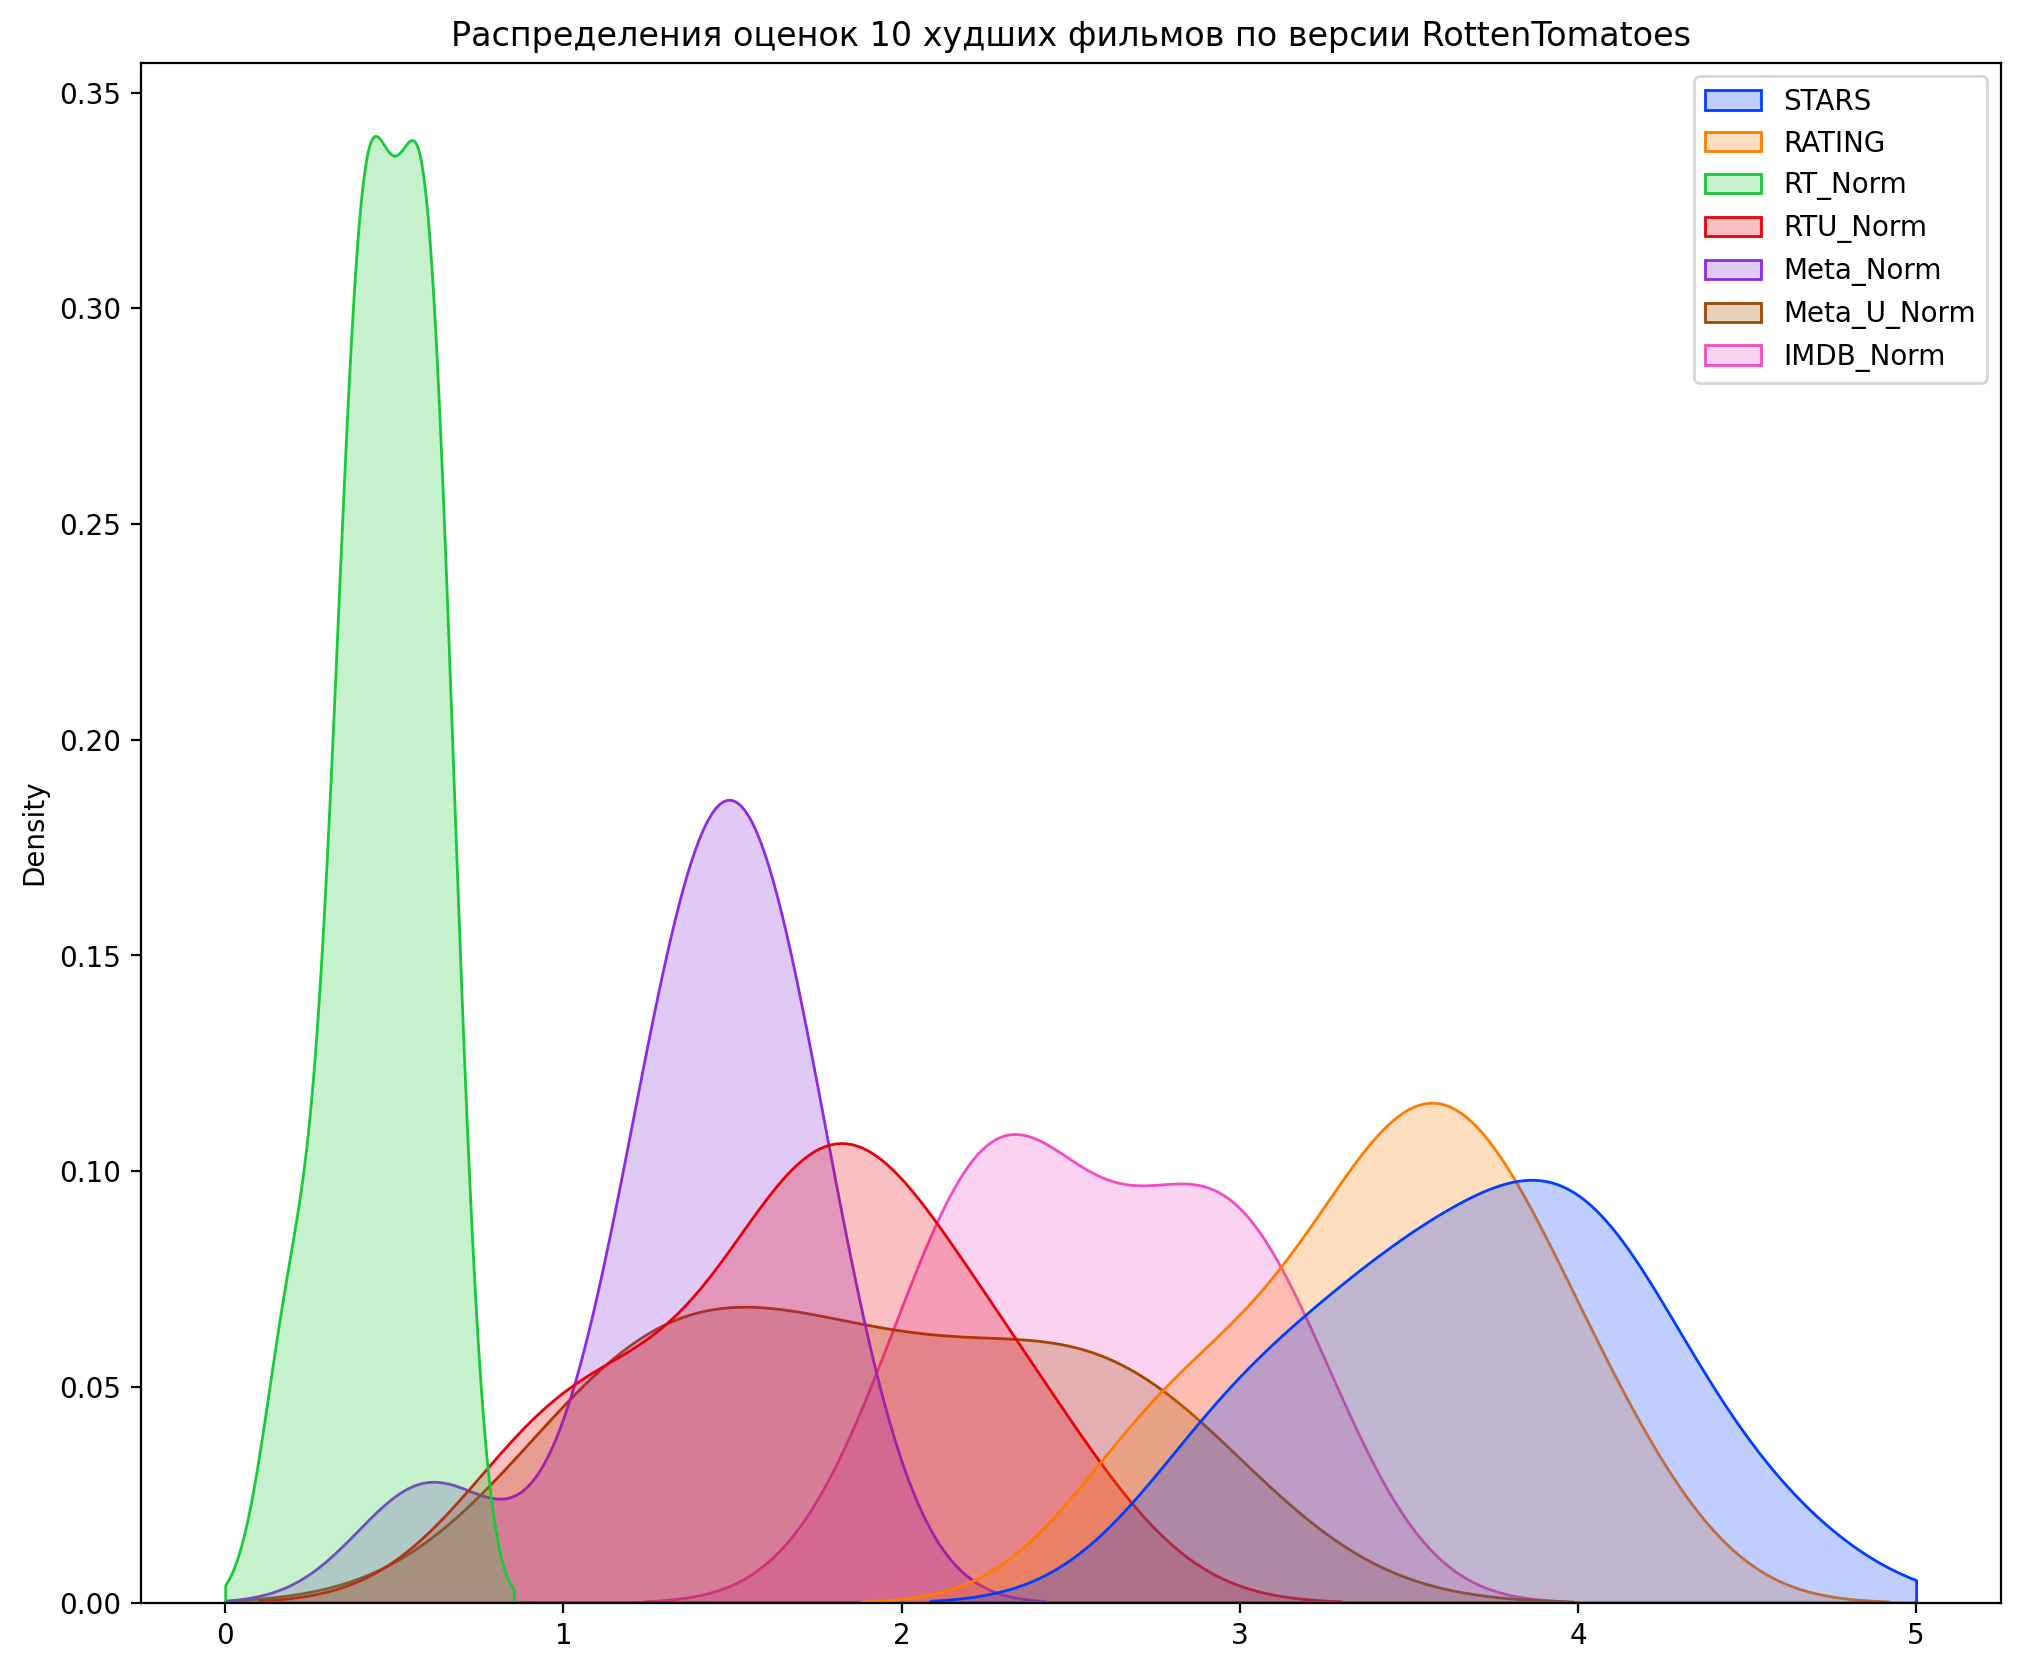

In [59]:
plt.figure(figsize=(12,10),dpi=200)
sns.kdeplot(data=worst_df, clip=[0,5], palette='bright',fill=True)
plt.title('Распределения оценок 10 худших фильмов по версии RottenTomatoes')

Оценки для других компаний не сильно отличаются от RottenTomatoes, но в Fandango как всегда завышенные оценки даже для худших фильмов.

----
# Вывод
----

**Таким образом, цель проекта достигнута. Благодаря исследованию рейтингов и их визуализации понятно, что компания Fandango намеренно завышала оценки фильмов, чтобы клиенты покупали больше билетов и ходили именно в их кинотеатр.**